# GAMA-15 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
0246c5d (Thu Jan 25 17:01:47 2018 +0000)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3, venn2

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, 
                                              find_last_ml_suffix, quick_checks)

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_gama-15_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_gama-15_20180129.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(208, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(208, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

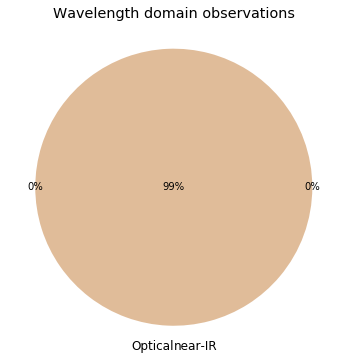

In [6]:
venn2(
    [
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 3)
    ],
    set_labels=('Optical', 'near-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

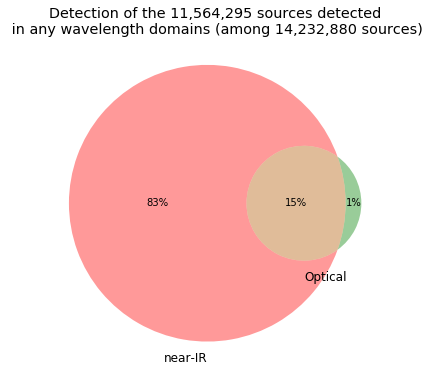

In [7]:
venn2(
    [
        np.sum(flag_det[flag_obs == 3] == 1),
        np.sum(flag_det[flag_obs == 3] == 2),
        np.sum(flag_det[flag_obs == 3] == 3)
    ],
    set_labels=('near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = [           "Omegacam u"]
g_bands = ["DECam g", "Omegacam g", "SUPRIME g", "GPC1 g"]
r_bands = ["DECam r", "Omegacam r", "SUPRIME r", "GPC1 r"]
i_bands = [           "Omegacam i", "SUPRIME i", "GPC1 i"]
z_bands = ["DECam z",               "SUPRIME z", "GPC1 z"]
y_bands = [                         "SUPRIME y", "GPC1 y"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

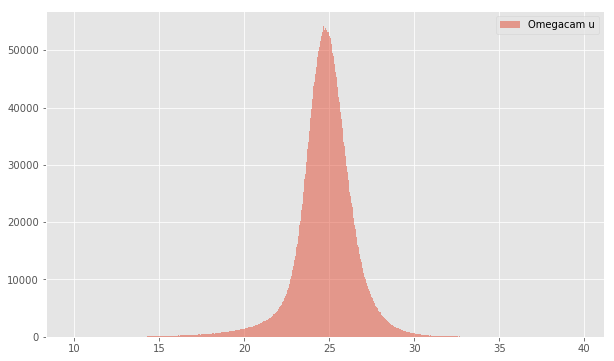

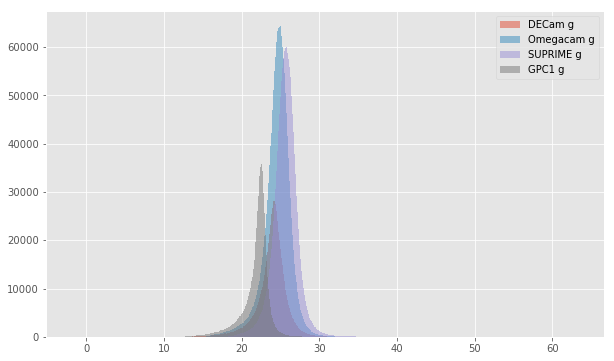

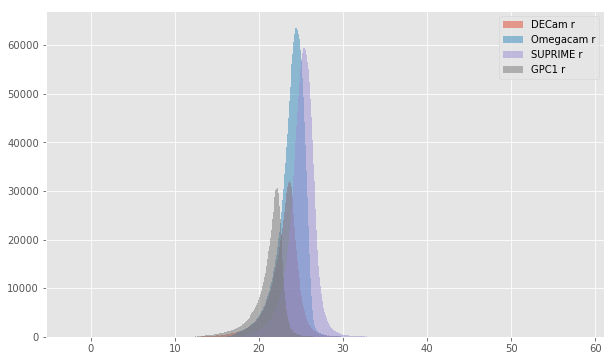

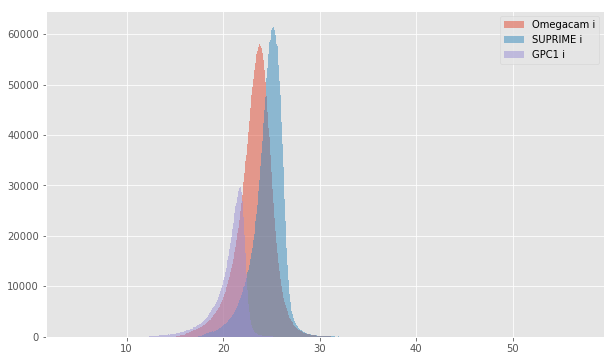

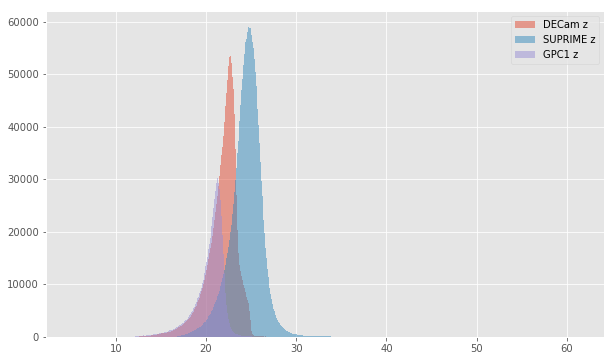

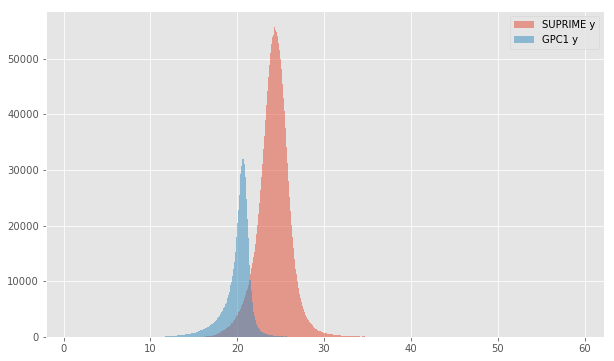

In [9]:
for bands in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

Omegacam g (aperture) - DECam g (aperture):
- Median: 0.18
- Median Absolute Deviation: 0.28
- 1% percentile: -2.634096145629883
- 99% percentile: 1.73380958557129


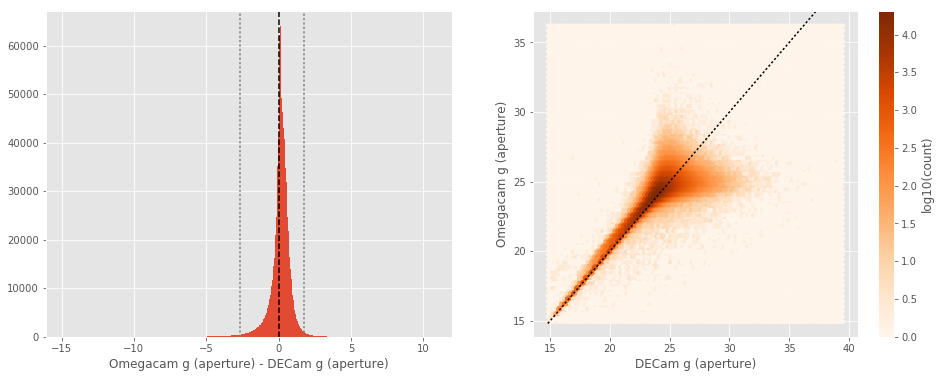

Omegacam g (total) - DECam g (total):
- Median: 0.09
- Median Absolute Deviation: 0.24
- 1% percentile: -2.4240271186828615
- 99% percentile: 2.0510866737365694


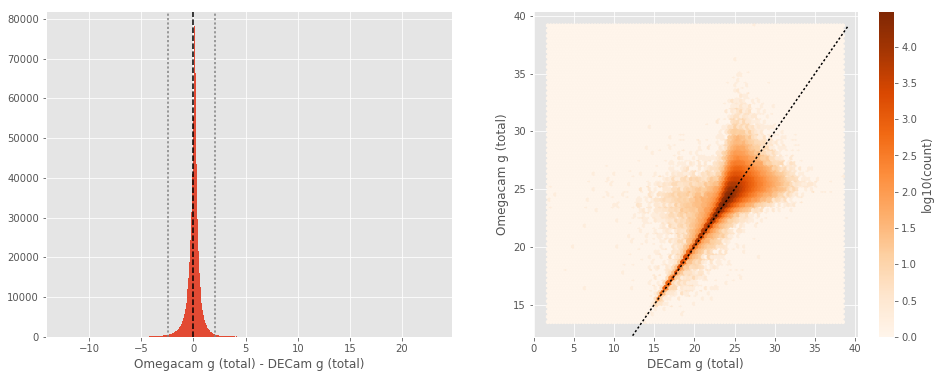

SUPRIME g (aperture) - DECam g (aperture):
- Median: 0.11
- Median Absolute Deviation: 0.31
- 1% percentile: -2.922472896575928
- 99% percentile: 2.2731615829467797


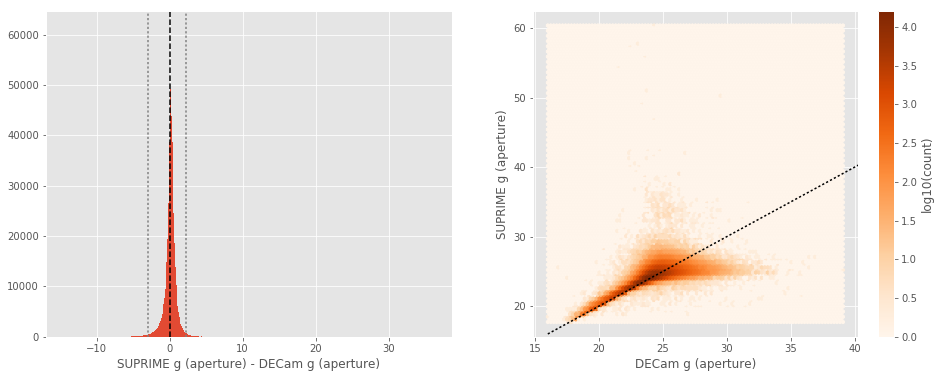

SUPRIME g (total) - DECam g (total):
- Median: -0.14
- Median Absolute Deviation: 0.26
- 1% percentile: -3.1349516105651856
- 99% percentile: 1.9637036705017081


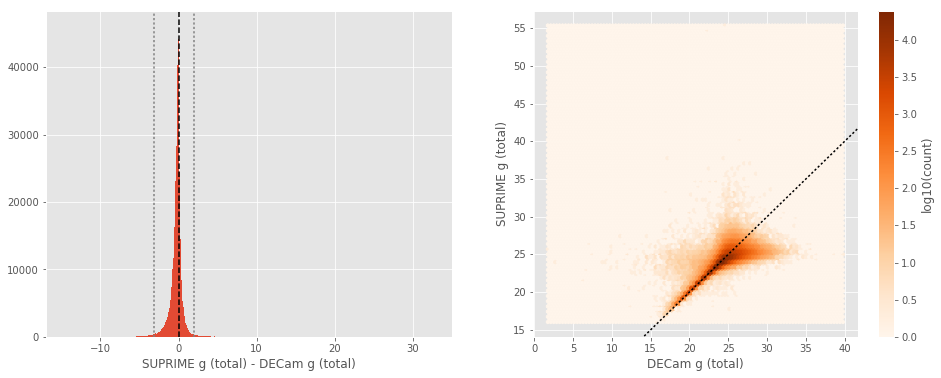

GPC1 g (aperture) - DECam g (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.30
- 1% percentile: -3.582785797119141
- 99% percentile: 2.3899072265624985


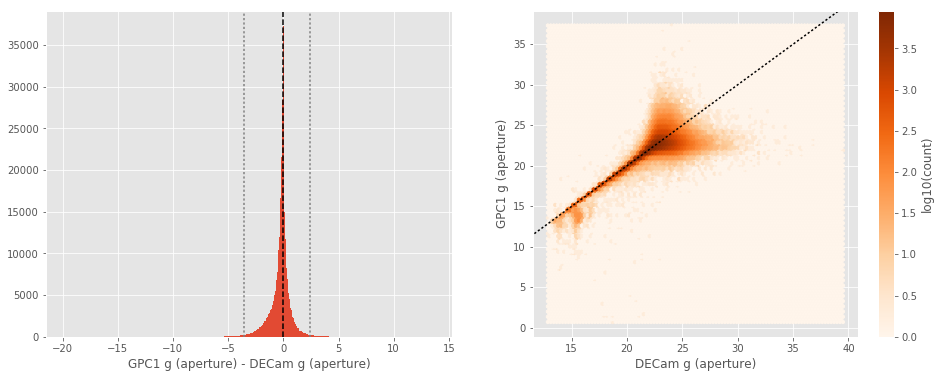

GPC1 g (total) - DECam g (total):
- Median: -0.00
- Median Absolute Deviation: 0.25
- 1% percentile: -3.7355956268310546
- 99% percentile: 1.9217100906371878


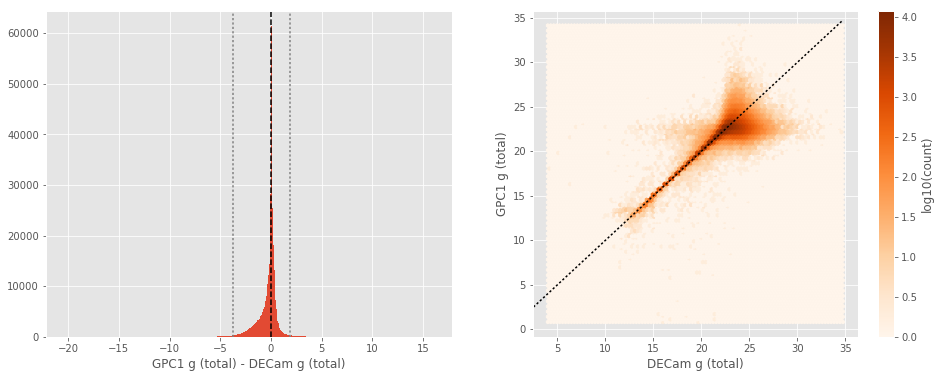

SUPRIME g (aperture) - Omegacam g (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.15
- 1% percentile: -1.639749526977539
- 99% percentile: 0.9492234992980966


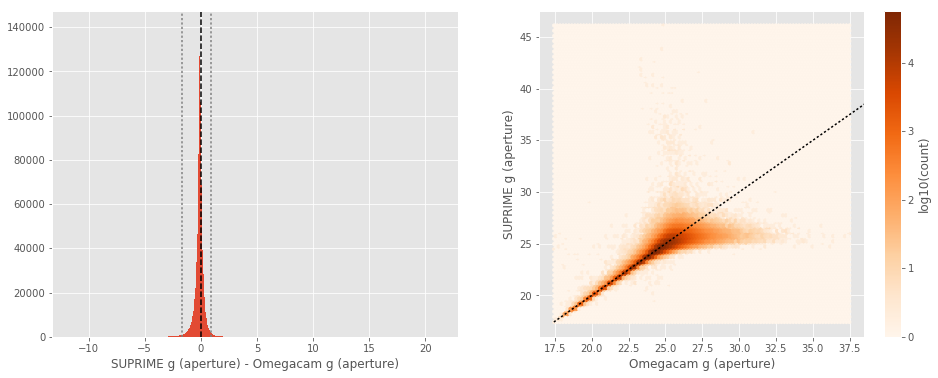

SUPRIME g (total) - Omegacam g (total):
- Median: -0.28
- Median Absolute Deviation: 0.25
- 1% percentile: -2.564059658050537
- 99% percentile: 1.128276958465567


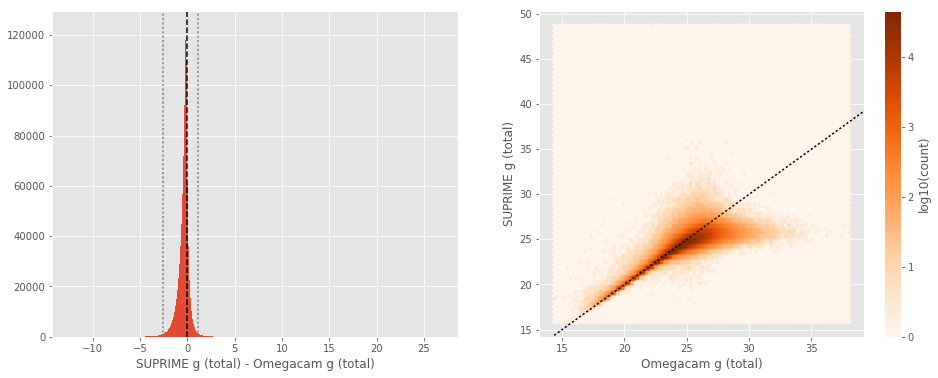

GPC1 g (aperture) - Omegacam g (aperture):
- Median: -0.31
- Median Absolute Deviation: 0.38
- 1% percentile: -3.1371237373352048
- 99% percentile: 2.213497180938726


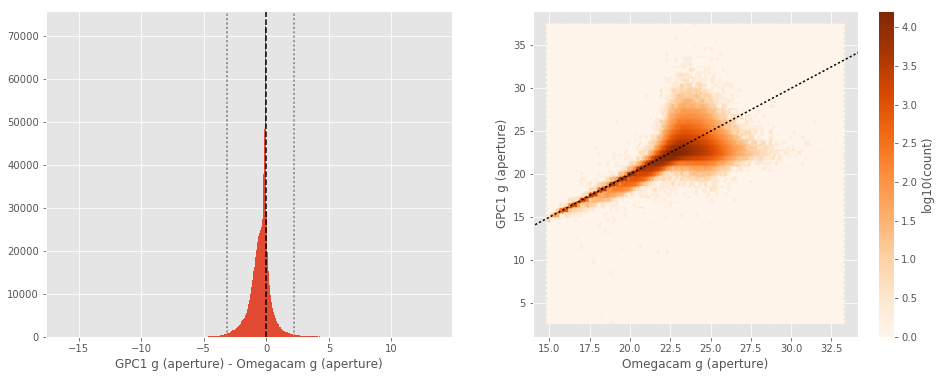

GPC1 g (total) - Omegacam g (total):
- Median: -0.12
- Median Absolute Deviation: 0.25
- 1% percentile: -3.543268051147461
- 99% percentile: 1.5813409042358293


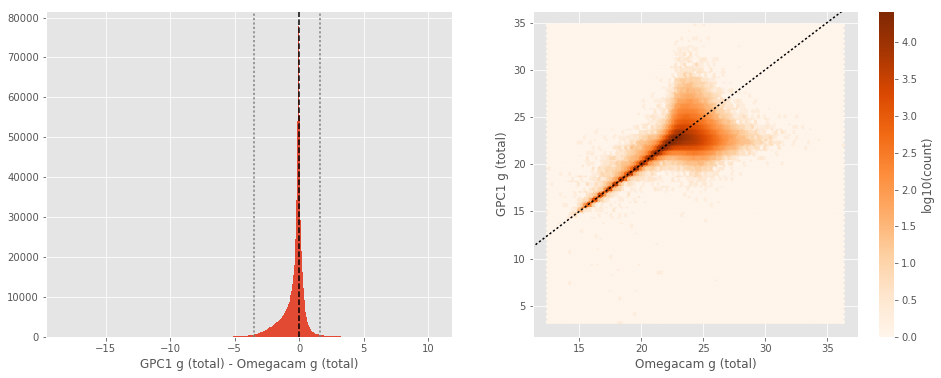

GPC1 g (aperture) - SUPRIME g (aperture):
- Median: -0.28
- Median Absolute Deviation: 0.43
- 1% percentile: -3.1680870056152344
- 99% percentile: 2.4179883003234885


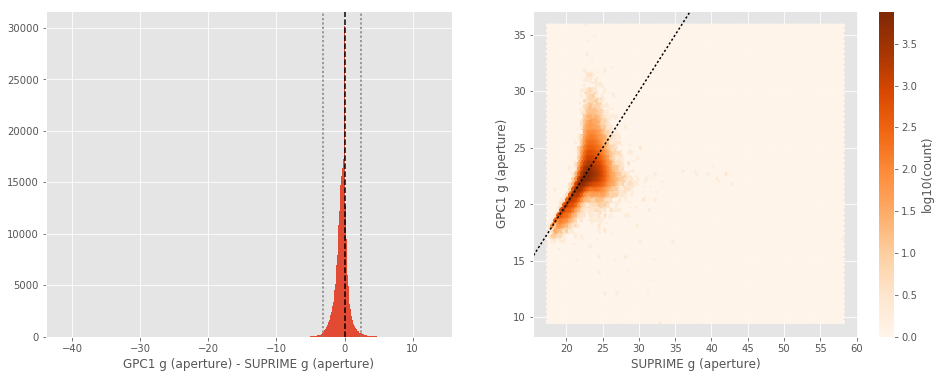

GPC1 g (total) - SUPRIME g (total):
- Median: -0.04
- Median Absolute Deviation: 0.30
- 1% percentile: -3.2857778167724607
- 99% percentile: 1.7586553955078141


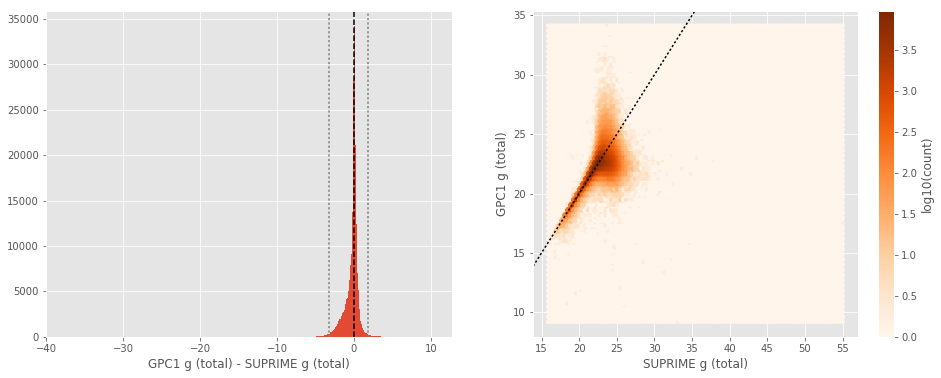

Omegacam r (aperture) - DECam r (aperture):
- Median: 0.20
- Median Absolute Deviation: 0.23
- 1% percentile: -2.137364654541016
- 99% percentile: 1.1862708282470713


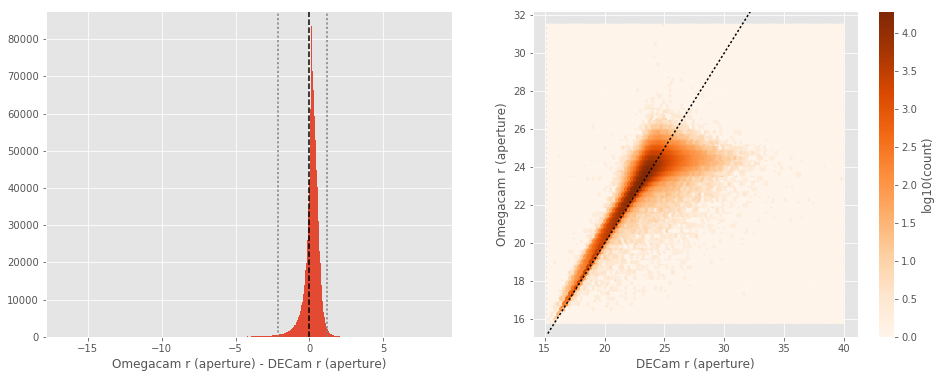

Omegacam r (total) - DECam r (total):
- Median: 0.17
- Median Absolute Deviation: 0.16
- 1% percentile: -1.1469199562072752
- 99% percentile: 1.4274457168579113


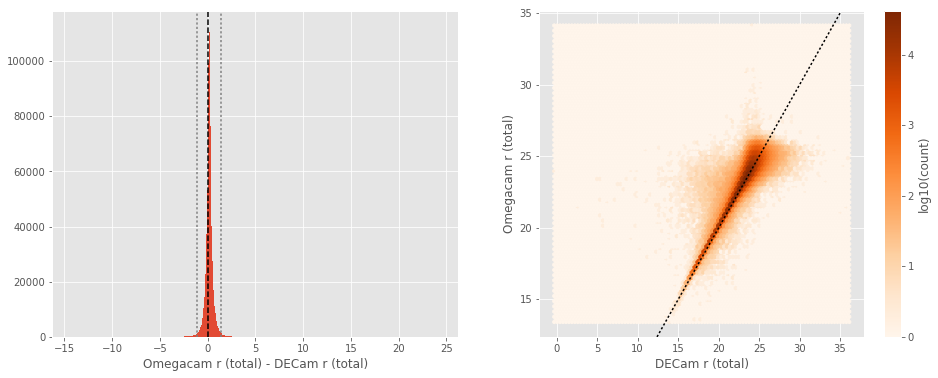

SUPRIME r (aperture) - DECam r (aperture):
- Median: 0.13
- Median Absolute Deviation: 0.26
- 1% percentile: -2.7111525154113774
- 99% percentile: 1.588455638885501


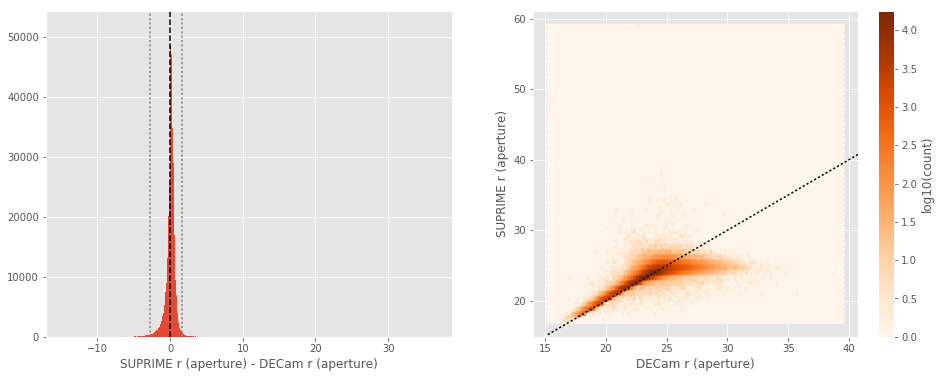

SUPRIME r (total) - DECam r (total):
- Median: -0.01
- Median Absolute Deviation: 0.19
- 1% percentile: -2.140242462158203
- 99% percentile: 1.6562129211425773


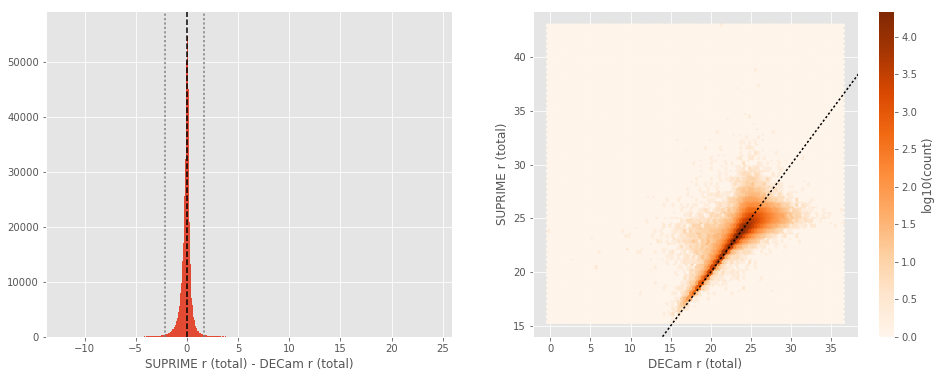

GPC1 r (aperture) - DECam r (aperture):
- Median: 0.10
- Median Absolute Deviation: 0.16
- 1% percentile: -2.022557506561279
- 99% percentile: 1.742434997558596


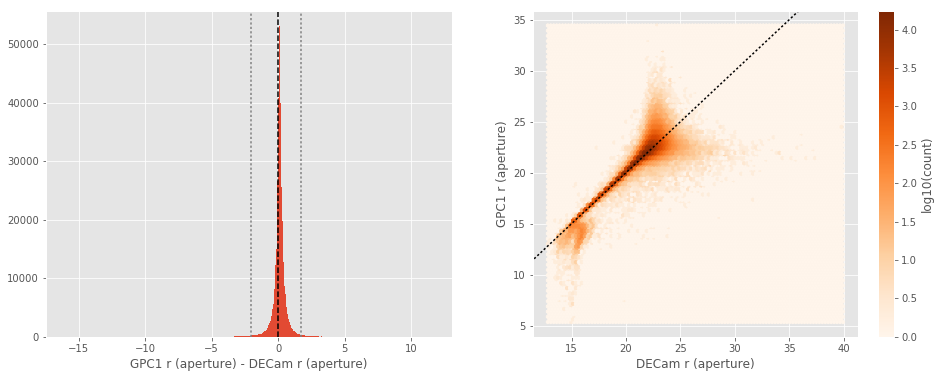

GPC1 r (total) - DECam r (total):
- Median: 0.21
- Median Absolute Deviation: 0.14
- 1% percentile: -1.4518033599853515
- 99% percentile: 1.7165108680725139


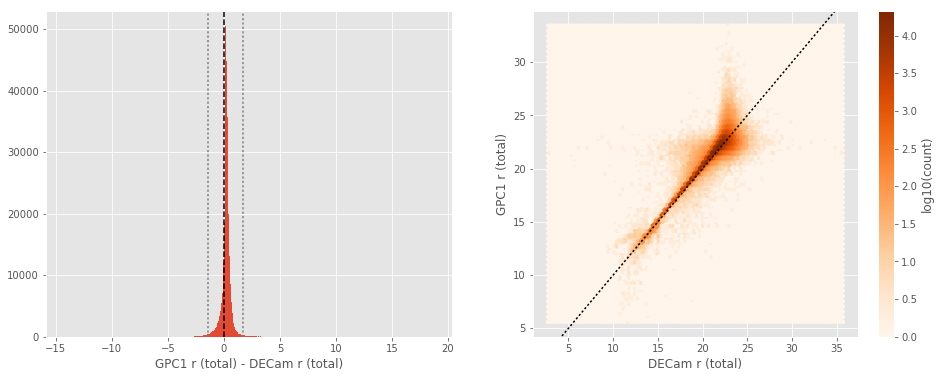

SUPRIME r (aperture) - Omegacam r (aperture):
- Median: -0.06
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8526588439941406
- 99% percentile: 0.8960708618164048


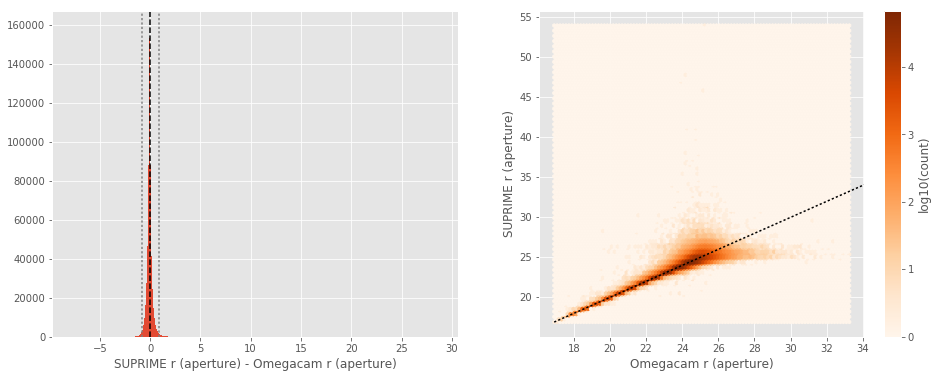

SUPRIME r (total) - Omegacam r (total):
- Median: -0.19
- Median Absolute Deviation: 0.18
- 1% percentile: -1.4241687393188478
- 99% percentile: 1.1404187583923342


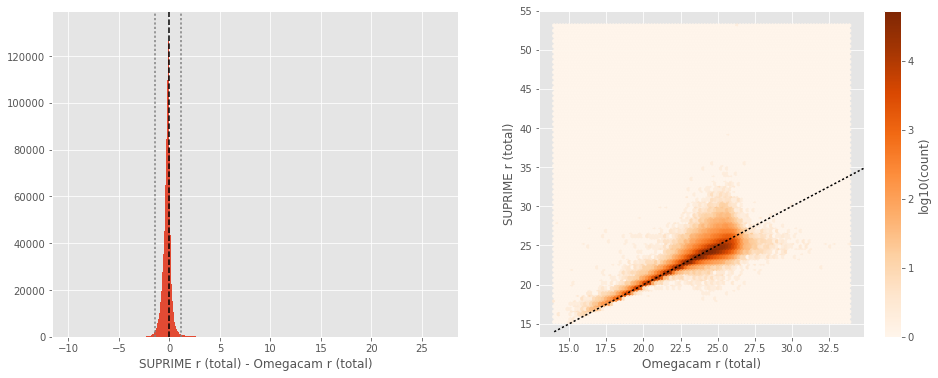

GPC1 r (aperture) - Omegacam r (aperture):
- Median: -0.11
- Median Absolute Deviation: 0.21
- 1% percentile: -1.3515098571777342
- 99% percentile: 1.496448478698733


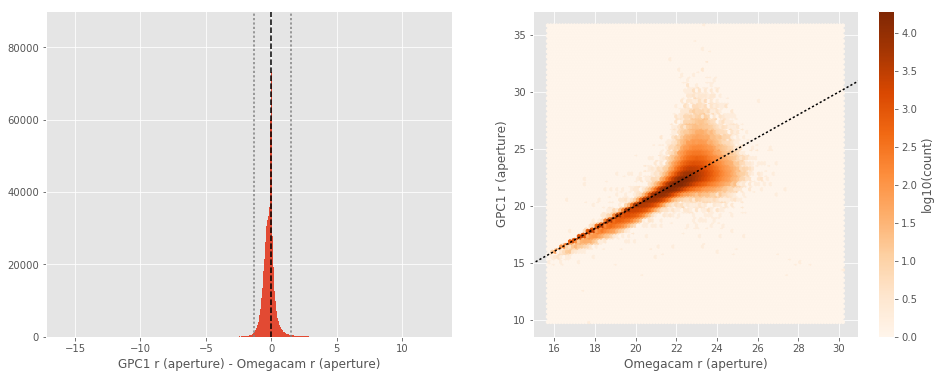

GPC1 r (total) - Omegacam r (total):
- Median: 0.05
- Median Absolute Deviation: 0.13
- 1% percentile: -1.5403206634521482
- 99% percentile: 1.1657170867919837


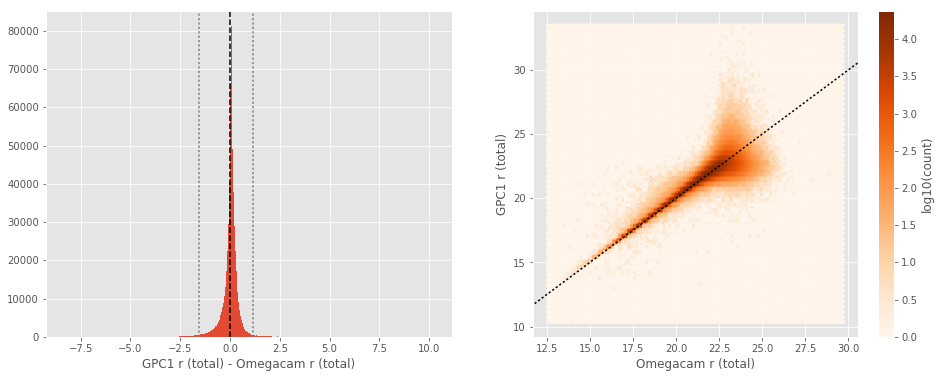

GPC1 r (aperture) - SUPRIME r (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.23
- 1% percentile: -1.5872383117675781
- 99% percentile: 1.525237350463859


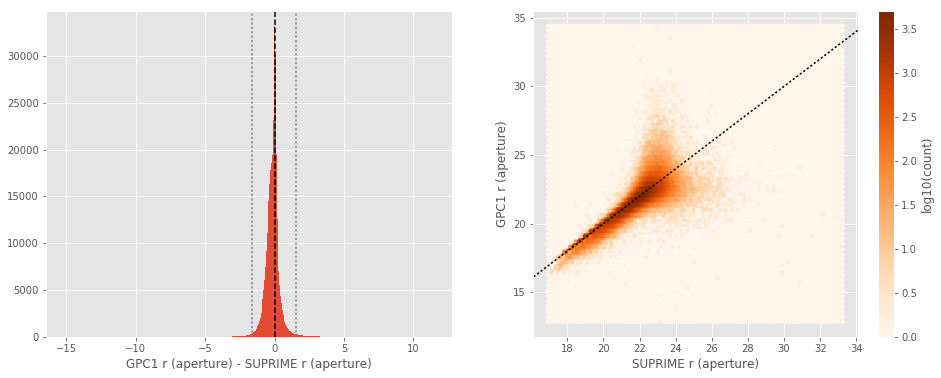

GPC1 r (total) - SUPRIME r (total):
- Median: 0.11
- Median Absolute Deviation: 0.15
- 1% percentile: -1.6637313461303709
- 99% percentile: 1.2613188362121595


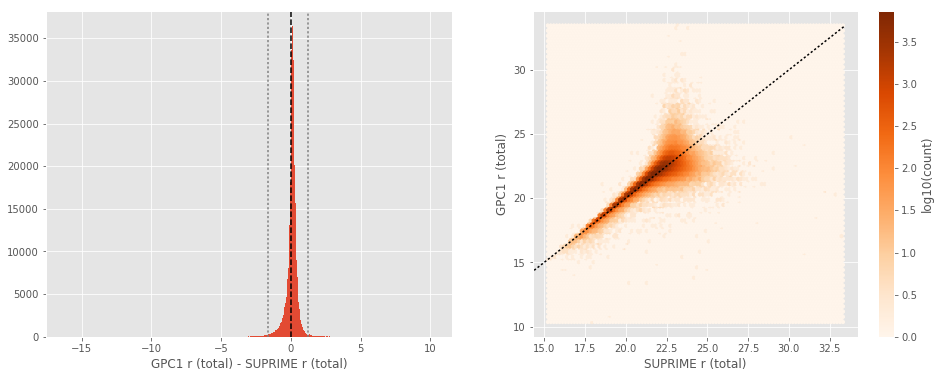

SUPRIME i (aperture) - Omegacam i (aperture):
- Median: -0.07
- Median Absolute Deviation: 0.18
- 1% percentile: -2.0469532012939453
- 99% percentile: 1.169138336181641


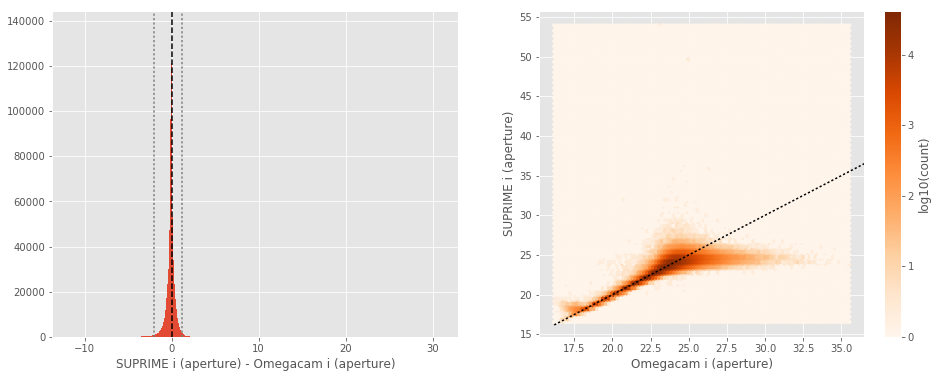

SUPRIME i (total) - Omegacam i (total):
- Median: -0.27
- Median Absolute Deviation: 0.27
- 1% percentile: -3.016033172607422
- 99% percentile: 1.297071933746338


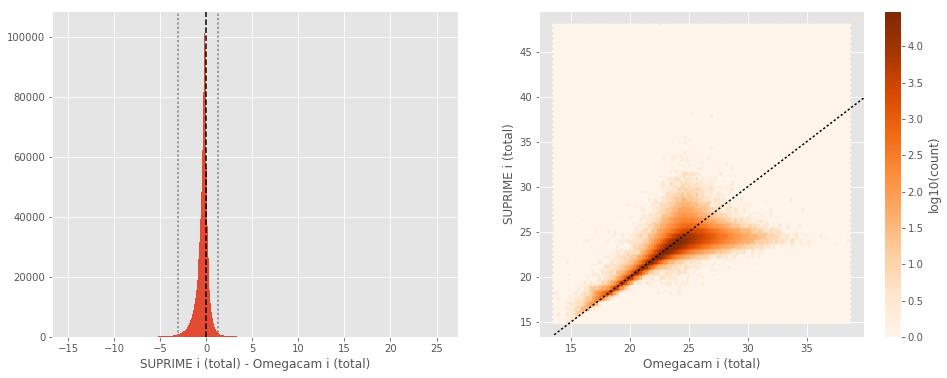

GPC1 i (aperture) - Omegacam i (aperture):
- Median: -0.08
- Median Absolute Deviation: 0.16
- 1% percentile: -0.9477043151855469
- 99% percentile: 0.8186016082763672


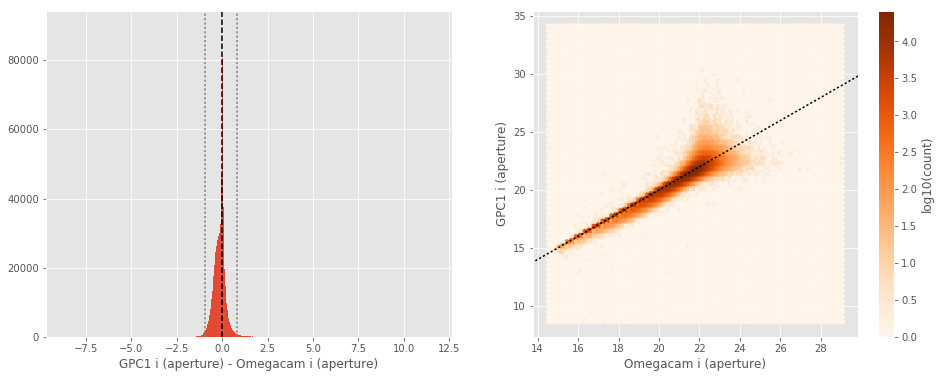

GPC1 i (total) - Omegacam i (total):
- Median: 0.05
- Median Absolute Deviation: 0.10
- 1% percentile: -0.8343009567260742
- 99% percentile: 0.6969107818603506


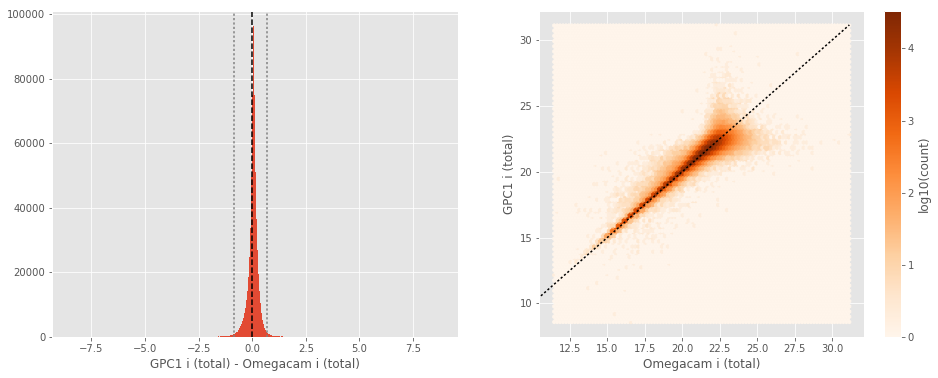

GPC1 i (aperture) - SUPRIME i (aperture):
- Median: -0.03
- Median Absolute Deviation: 0.18
- 1% percentile: -1.1367273139953613
- 99% percentile: 0.9213391876220709


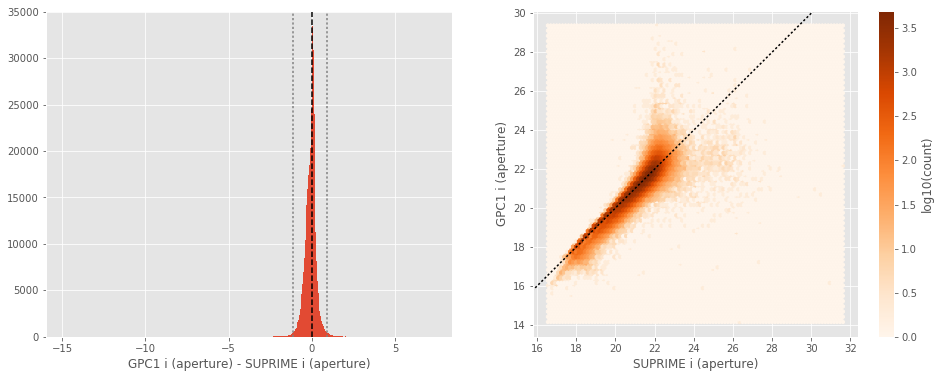

GPC1 i (total) - SUPRIME i (total):
- Median: 0.20
- Median Absolute Deviation: 0.11
- 1% percentile: -0.8914554595947265
- 99% percentile: 0.7686335754394538


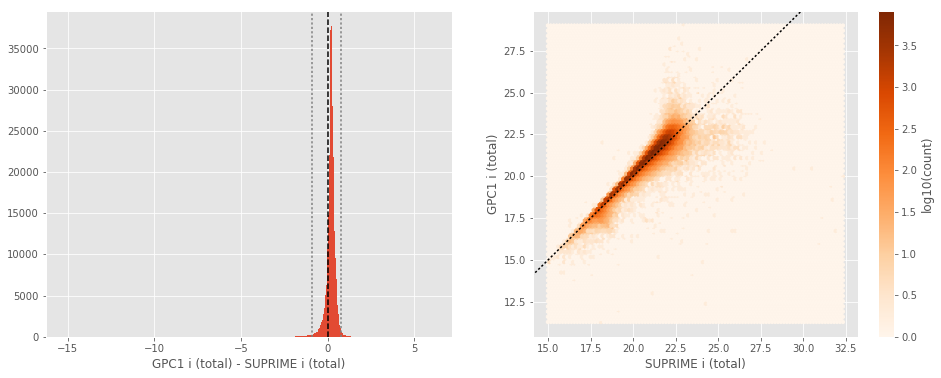

SUPRIME z (aperture) - DECam z (aperture):
- Median: 0.05
- Median Absolute Deviation: 0.22
- 1% percentile: -2.385577850341797
- 99% percentile: 1.2567932891845697


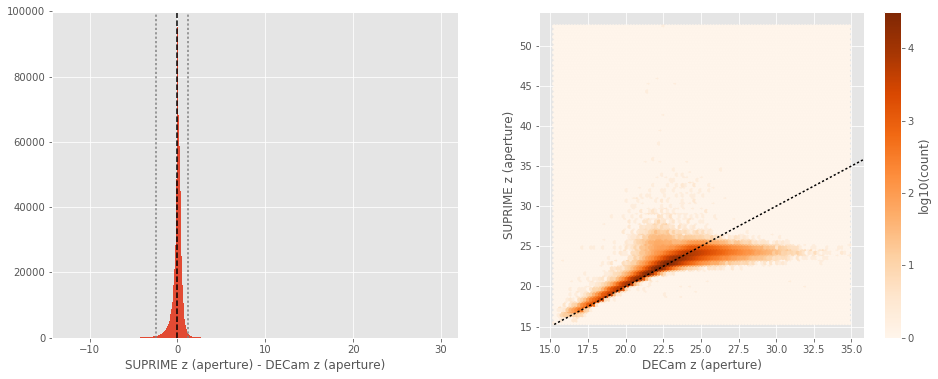

SUPRIME z (total) - DECam z (total):
- Median: 0.03
- Median Absolute Deviation: 0.13
- 1% percentile: -0.8611987304687501
- 99% percentile: 1.6053555679321367


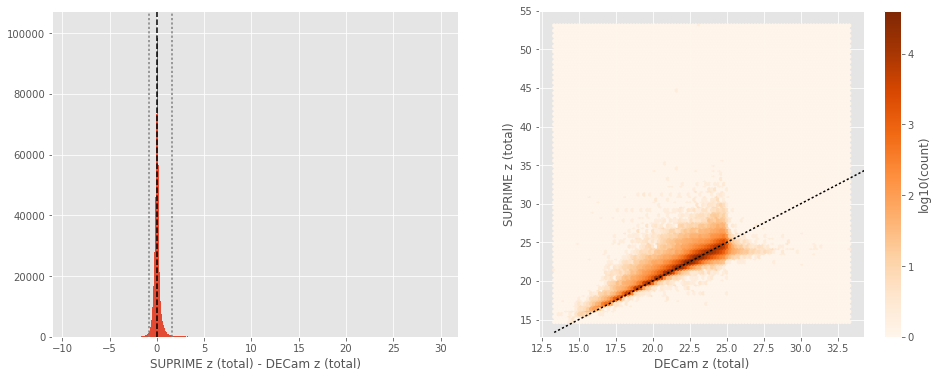

GPC1 z (aperture) - DECam z (aperture):
- Median: 0.09
- Median Absolute Deviation: 0.12
- 1% percentile: -1.6480256843566894
- 99% percentile: 1.2552158927917487


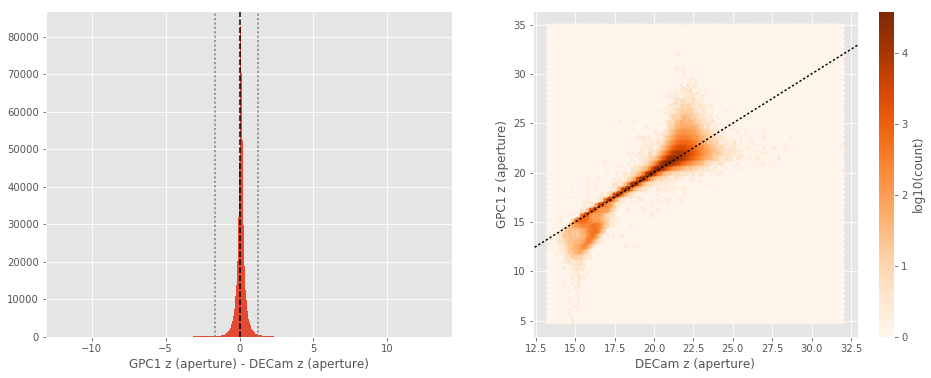

GPC1 z (total) - DECam z (total):
- Median: 0.26
- Median Absolute Deviation: 0.12
- 1% percentile: -0.7882545471191406
- 99% percentile: 1.373531684875486


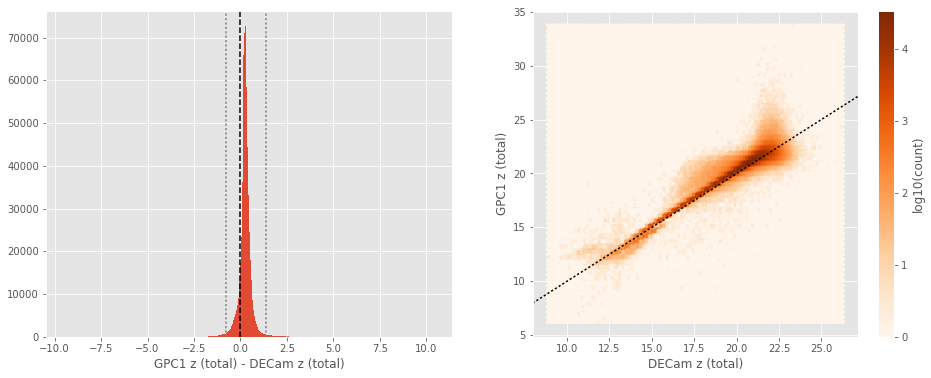

GPC1 z (aperture) - SUPRIME z (aperture):
- Median: -0.04
- Median Absolute Deviation: 0.20
- 1% percentile: -1.1917795181274413
- 99% percentile: 1.2728551101684569


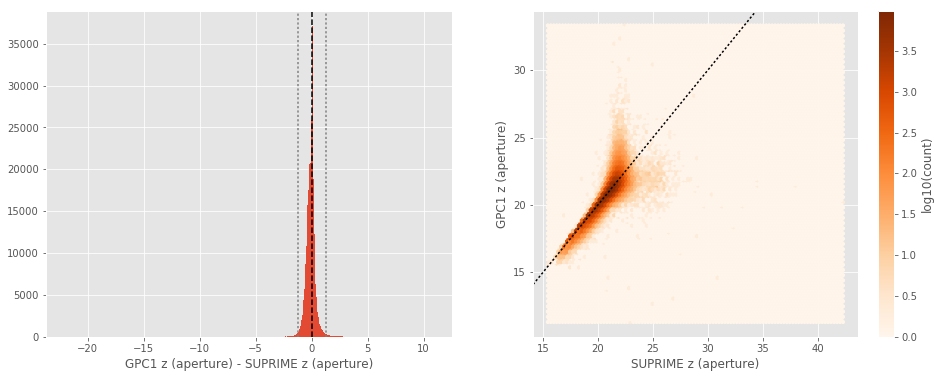

GPC1 z (total) - SUPRIME z (total):
- Median: 0.18
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0532553100585937
- 99% percentile: 0.9818671417236327


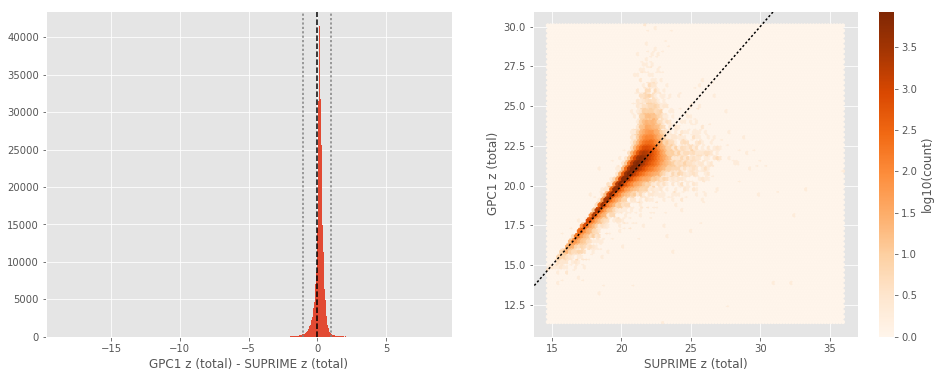

GPC1 y (aperture) - SUPRIME y (aperture):
- Median: -0.19
- Median Absolute Deviation: 0.28
- 1% percentile: -1.8443033599853516
- 99% percentile: 1.679386215209945


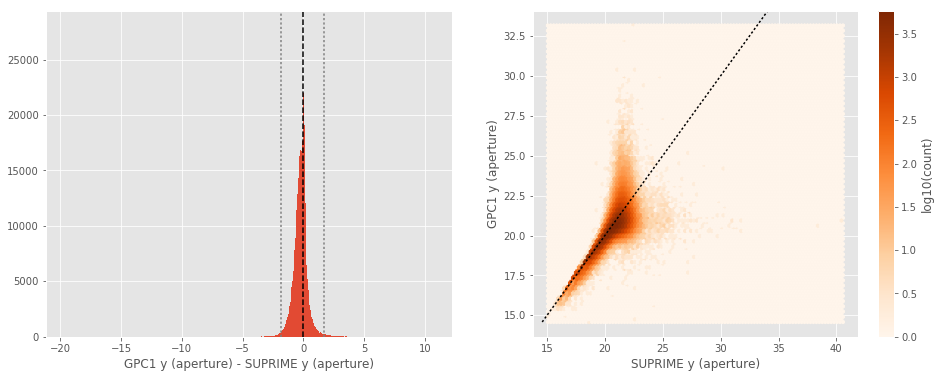

GPC1 y (total) - SUPRIME y (total):
- Median: 0.09
- Median Absolute Deviation: 0.23
- 1% percentile: -2.0898357391357423
- 99% percentile: 1.6052894592285112


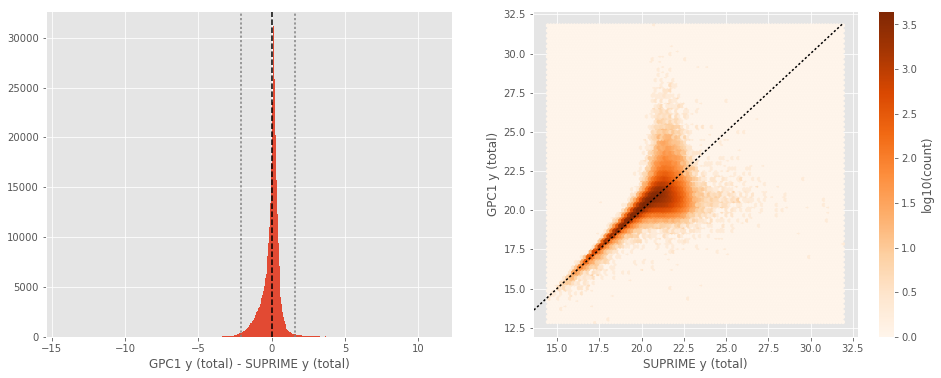

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [12]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_GAMA-15.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

Omegacam u (aperture) - SDSS u (fiberMag):
- Median: 0.06
- Median Absolute Deviation: 0.42
- 1% percentile: -1.6777433204650878
- 99% percentile: 2.9605134963989226


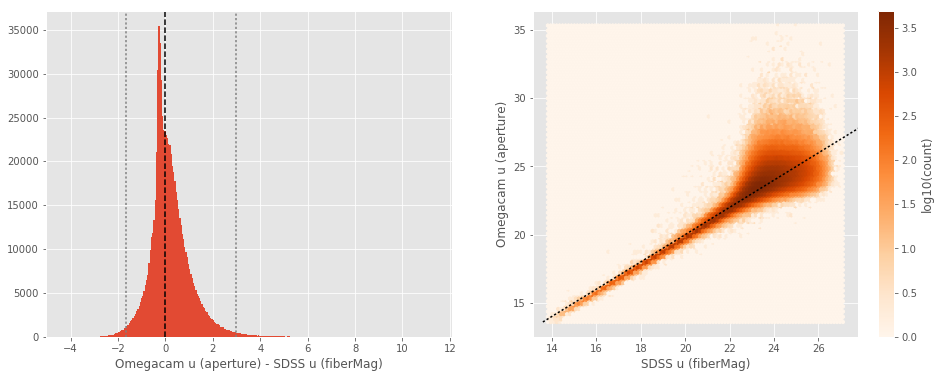

Omegacam u (total) - SDSS u (petroMag):
- Median: 0.32
- Median Absolute Deviation: 0.79
- 1% percentile: -3.572389373779297
- 99% percentile: 4.141102294921889


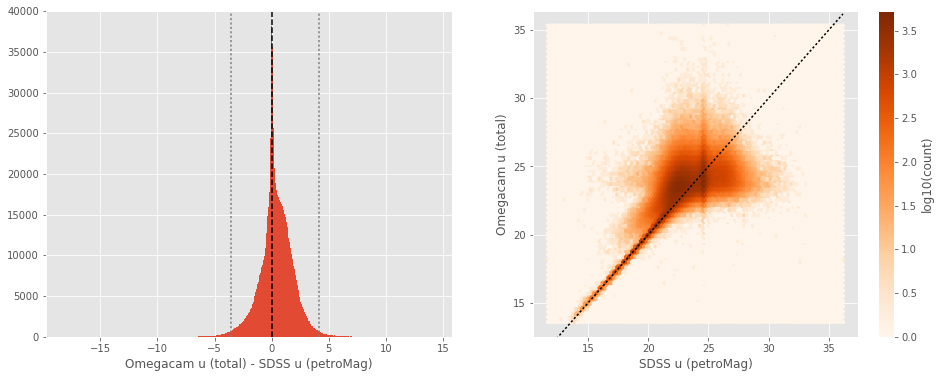

DECam g (aperture) - SDSS g (fiberMag):
- Median: -0.42
- Median Absolute Deviation: 0.17
- 1% percentile: -1.287907028198242
- 99% percentile: 1.732054214477536


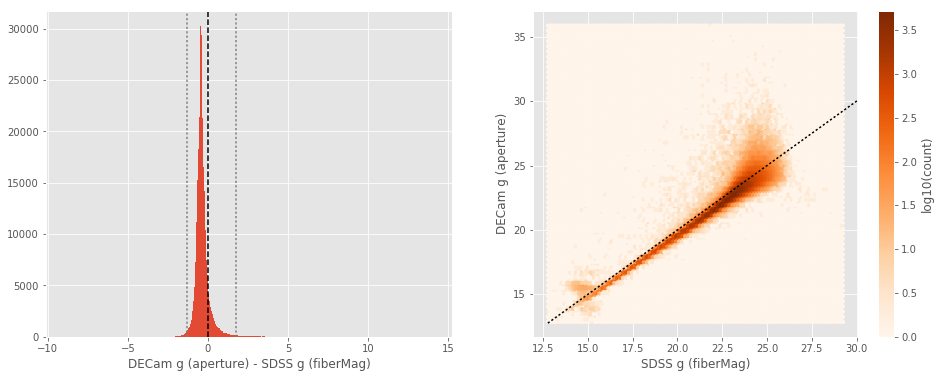

DECam g (total) - SDSS g (petroMag):
- Median: -0.07
- Median Absolute Deviation: 0.27
- 1% percentile: -3.2379779624938965
- 99% percentile: 2.3154718208312697


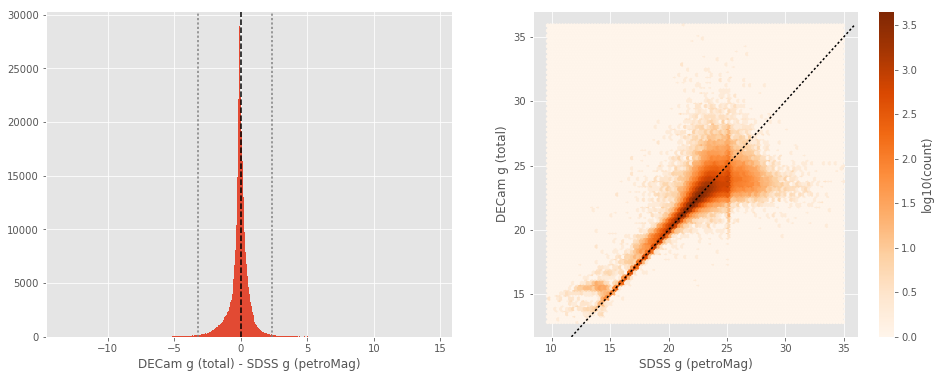

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in less


Omegacam g (aperture) - SDSS g (fiberMag):
- Median: -0.21
- Median Absolute Deviation: 0.15
- 1% percentile: -1.0146925735473633
- 99% percentile: 0.9640124511718753


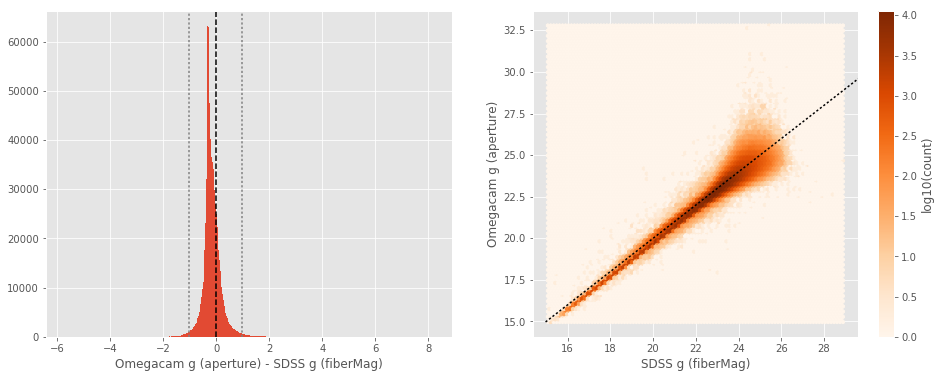

Omegacam g (total) - SDSS g (petroMag):
- Median: 0.04
- Median Absolute Deviation: 0.33
- 1% percentile: -3.0399436950683594
- 99% percentile: 1.910231590270996


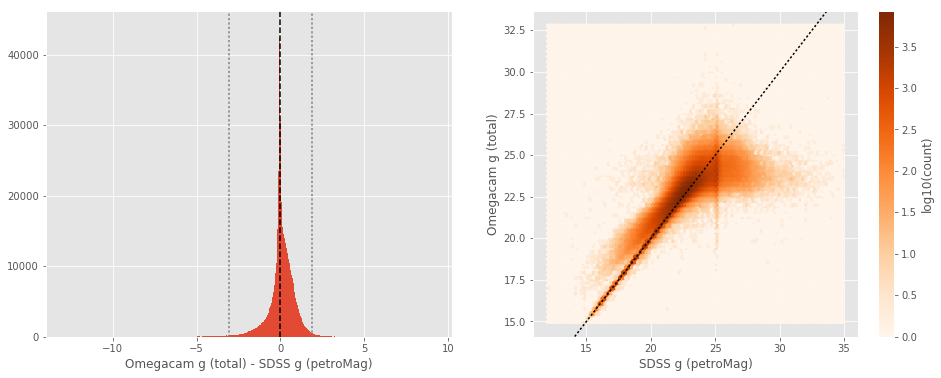

SUPRIME g (aperture) - SDSS g (fiberMag):
- Median: -0.29
- Median Absolute Deviation: 0.16
- 1% percentile: -1.10162353515625
- 99% percentile: 0.9030033111572264


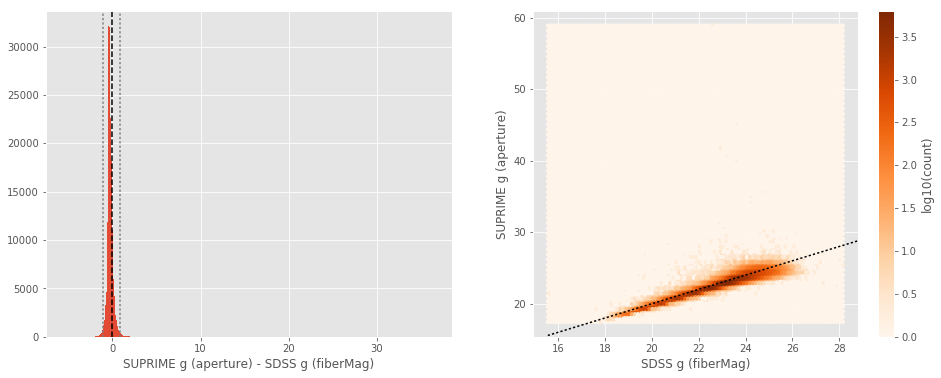

SUPRIME g (total) - SDSS g (petroMag):
- Median: -0.02
- Median Absolute Deviation: 0.35
- 1% percentile: -3.0725487899780273
- 99% percentile: 1.8739874267578123


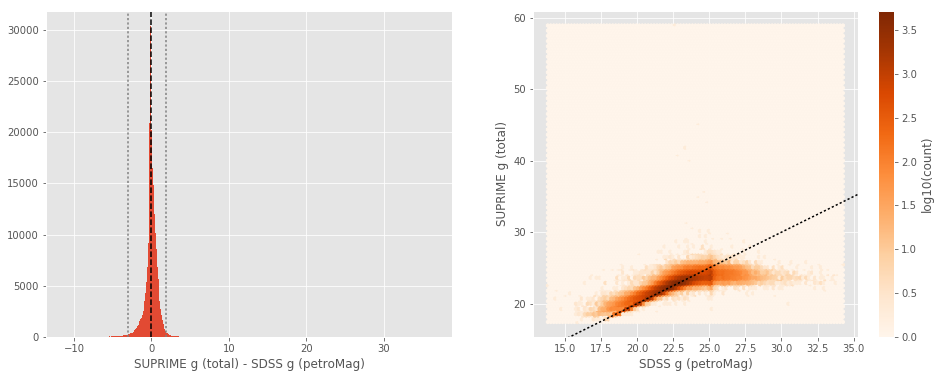

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.50
- Median Absolute Deviation: 0.29
- 1% percentile: -2.7221376419067385
- 99% percentile: 1.9057595252990729


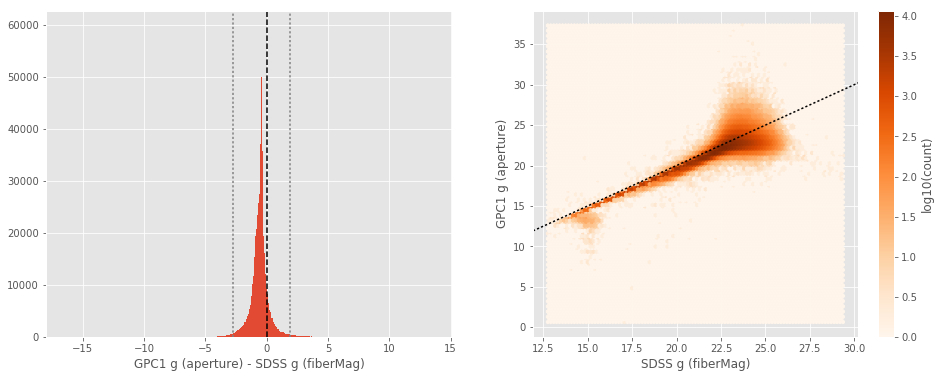

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.12
- Median Absolute Deviation: 0.30
- 1% percentile: -4.07849645614624
- 99% percentile: 2.268861007690436


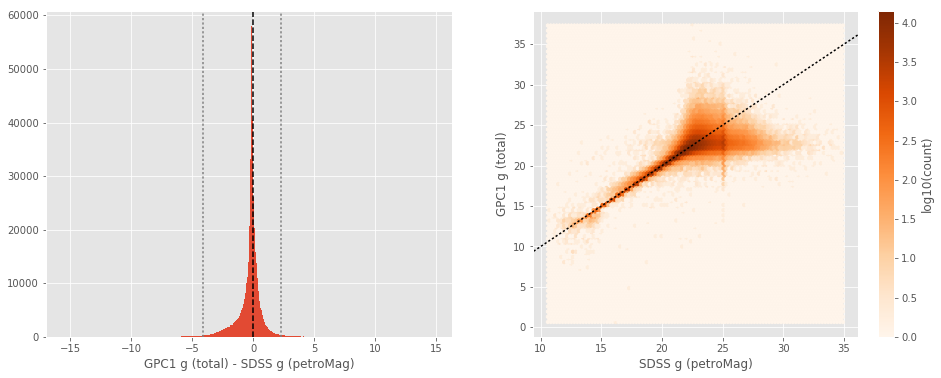

DECam r (aperture) - SDSS r (fiberMag):
- Median: -0.50
- Median Absolute Deviation: 0.13
- 1% percentile: -1.2138477325439452
- 99% percentile: 0.8274073028564413


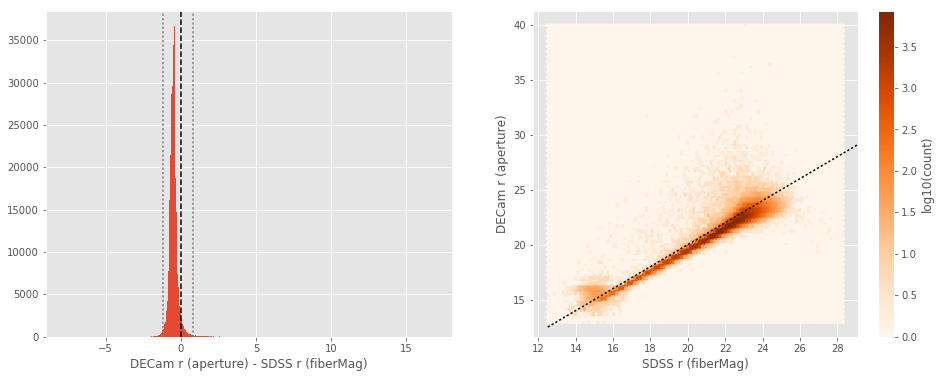

DECam r (total) - SDSS r (petroMag):
- Median: -0.14
- Median Absolute Deviation: 0.20
- 1% percentile: -2.9501192474365237
- 99% percentile: 1.6291219329834012


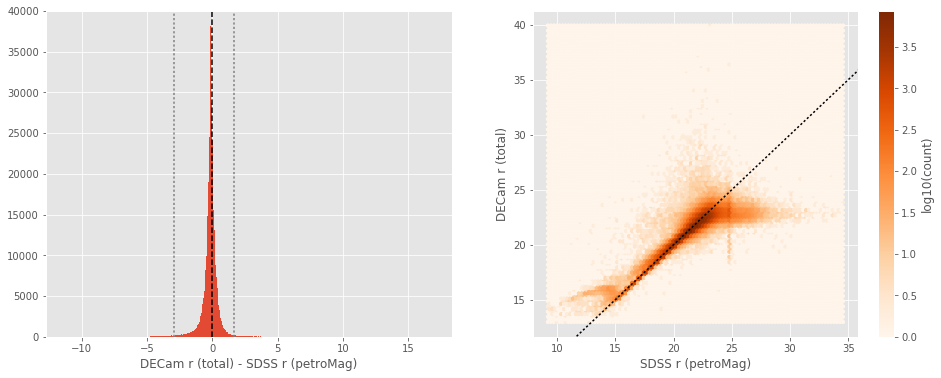

Omegacam r (aperture) - SDSS r (fiberMag):
- Median: -0.26
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9293511772155763
- 99% percentile: 0.38018566131591847


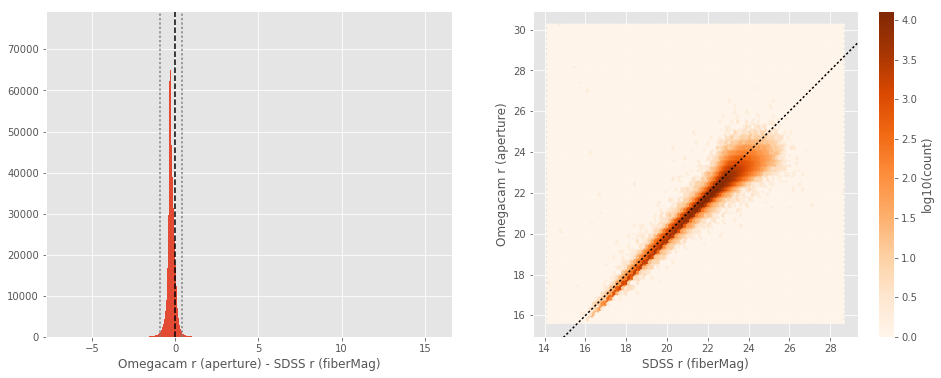

Omegacam r (total) - SDSS r (petroMag):
- Median: 0.03
- Median Absolute Deviation: 0.25
- 1% percentile: -2.7229127883911133
- 99% percentile: 1.5044150352478027


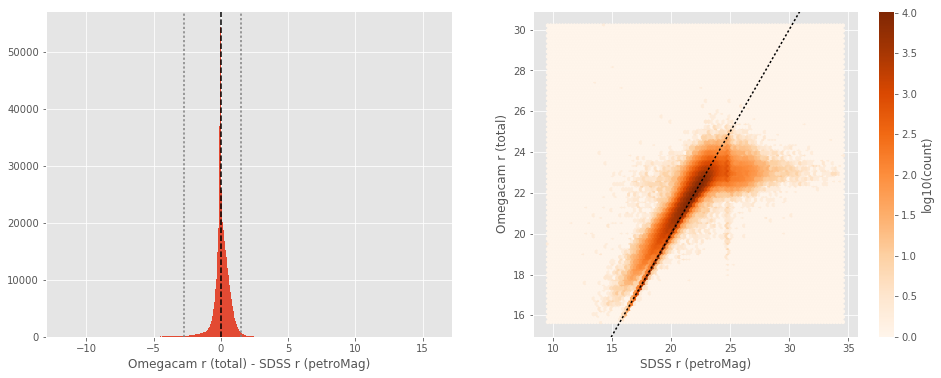

SUPRIME r (aperture) - SDSS r (fiberMag):
- Median: -0.31
- Median Absolute Deviation: 0.13
- 1% percentile: -0.9976661682128906
- 99% percentile: 0.5201660156250011


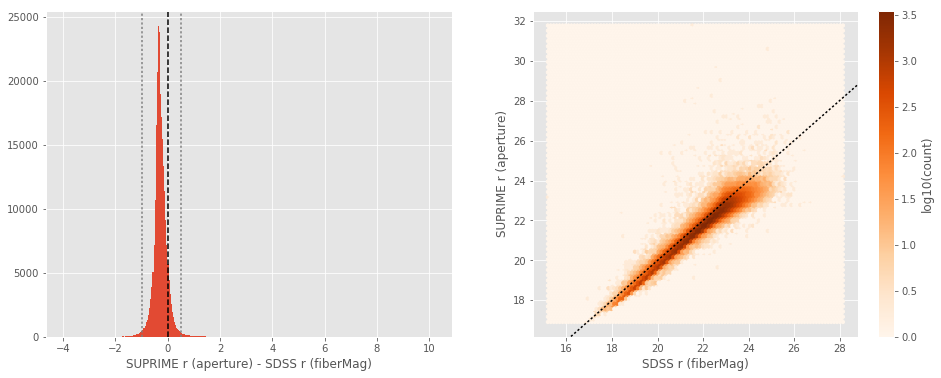

SUPRIME r (total) - SDSS r (petroMag):
- Median: -0.01
- Median Absolute Deviation: 0.27
- 1% percentile: -2.855342388153076
- 99% percentile: 1.5391726684570313


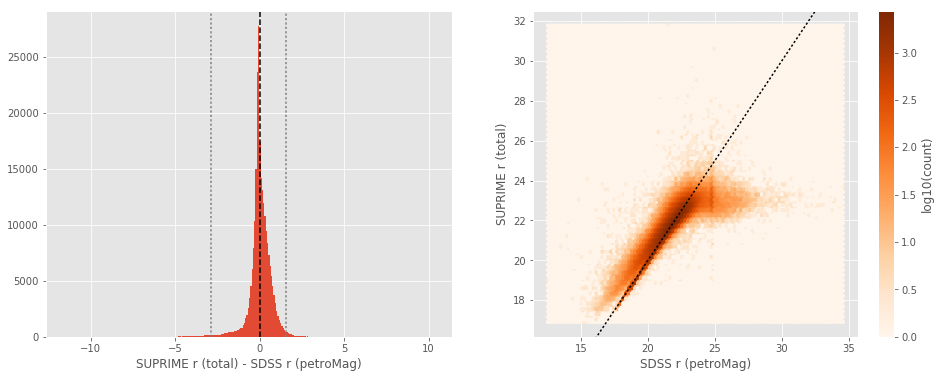

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.38
- Median Absolute Deviation: 0.15
- 1% percentile: -1.4833755493164062
- 99% percentile: 0.9636192321777344


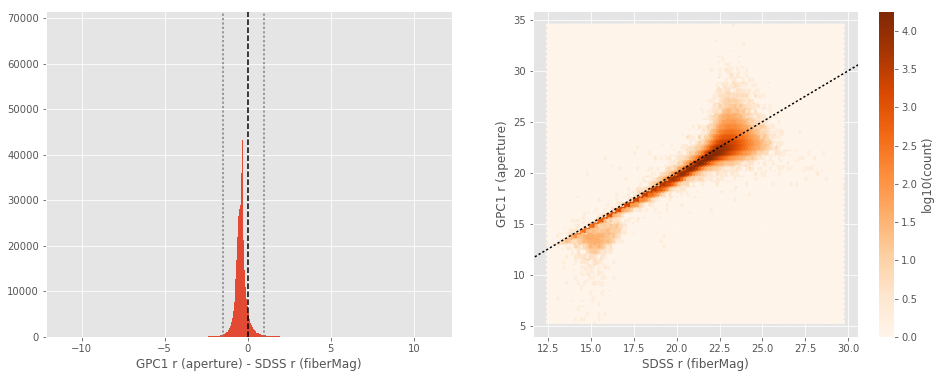

GPC1 r (total) - SDSS r (petroMag):
- Median: -0.03
- Median Absolute Deviation: 0.18
- 1% percentile: -2.4769830322265625
- 99% percentile: 1.4538796806335426


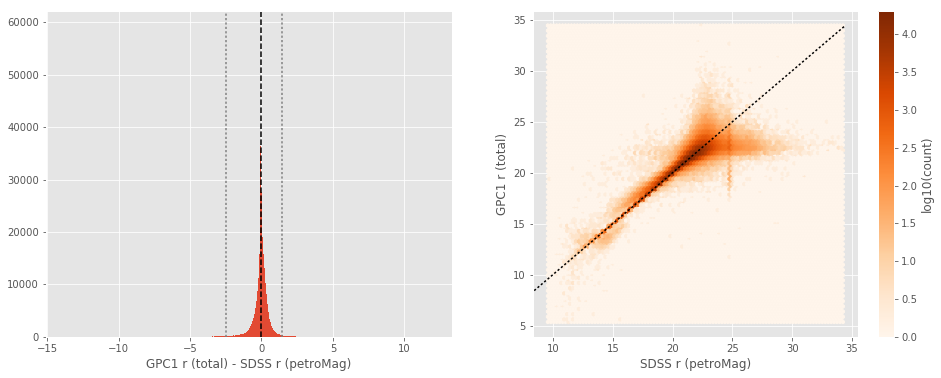

Omegacam i (aperture) - SDSS i (fiberMag):
- Median: -0.26
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9333876609802246
- 99% percentile: 0.4504387855529779


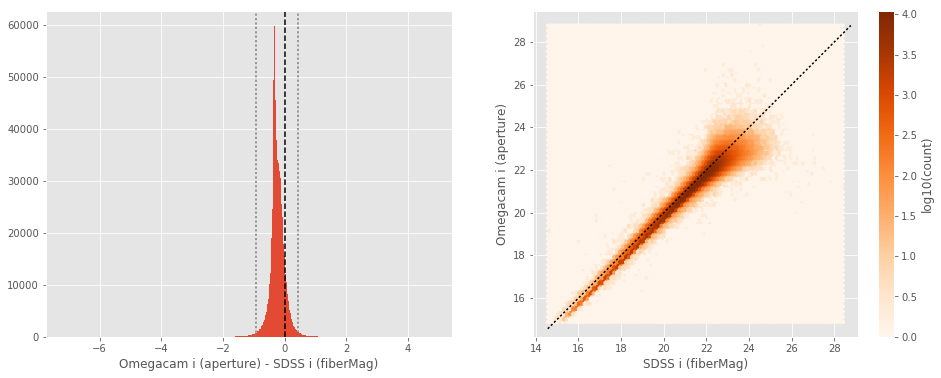

Omegacam i (total) - SDSS i (petroMag):
- Median: 0.02
- Median Absolute Deviation: 0.25
- 1% percentile: -3.2204542160034184
- 99% percentile: 1.4668953704833978


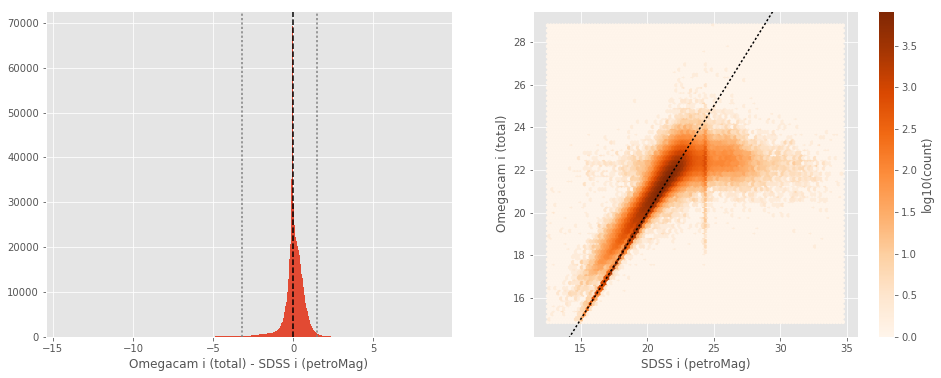

SUPRIME i (aperture) - SDSS i (fiberMag):
- Median: -0.32
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0100884246826172
- 99% percentile: 0.52162536621094


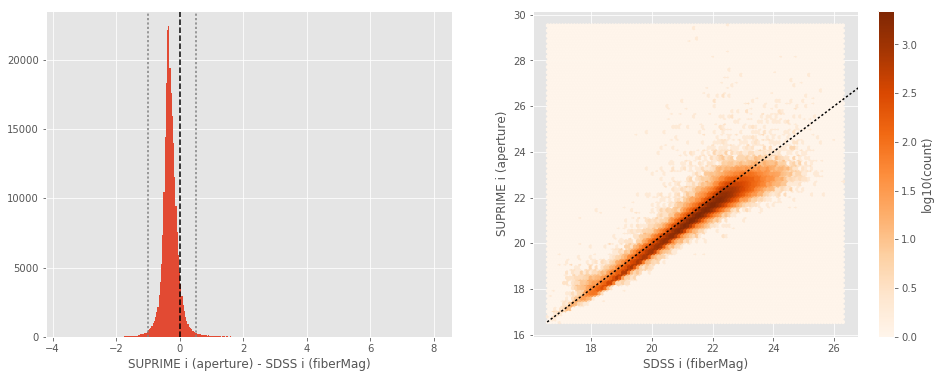

SUPRIME i (total) - SDSS i (petroMag):
- Median: -0.02
- Median Absolute Deviation: 0.27
- 1% percentile: -3.4856629371643066
- 99% percentile: 1.4867892265319824


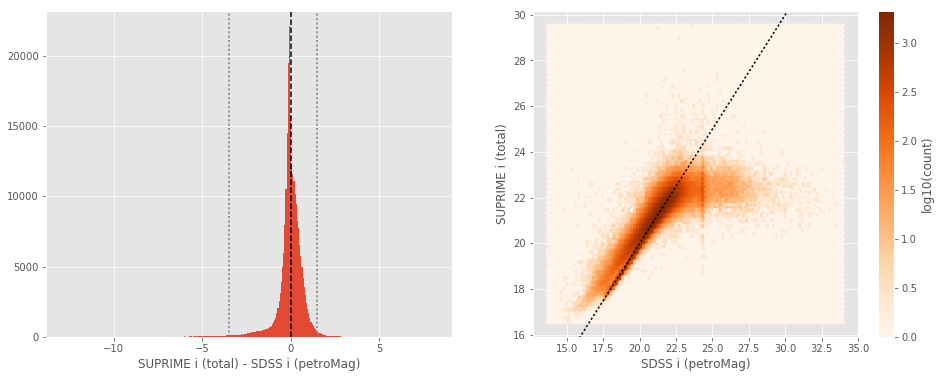

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.36
- Median Absolute Deviation: 0.12
- 1% percentile: -1.0263816833496096
- 99% percentile: 0.4693404197692874


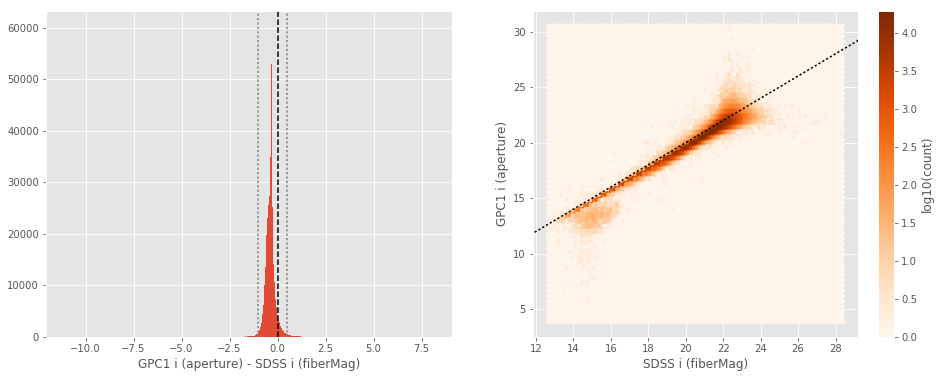

GPC1 i (total) - SDSS i (petroMag):
- Median: -0.02
- Median Absolute Deviation: 0.16
- 1% percentile: -2.5398798942565914
- 99% percentile: 1.065571212768555


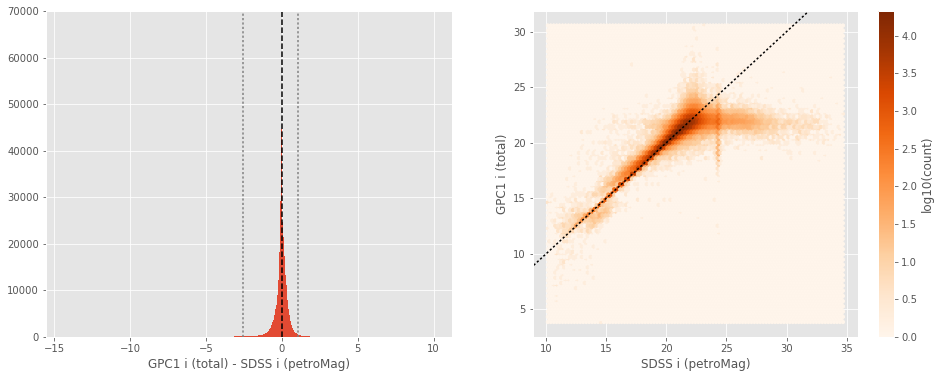

DECam z (aperture) - SDSS z (fiberMag):
- Median: -0.37
- Median Absolute Deviation: 0.18
- 1% percentile: -1.4442152404785156
- 99% percentile: 1.3228296661376957


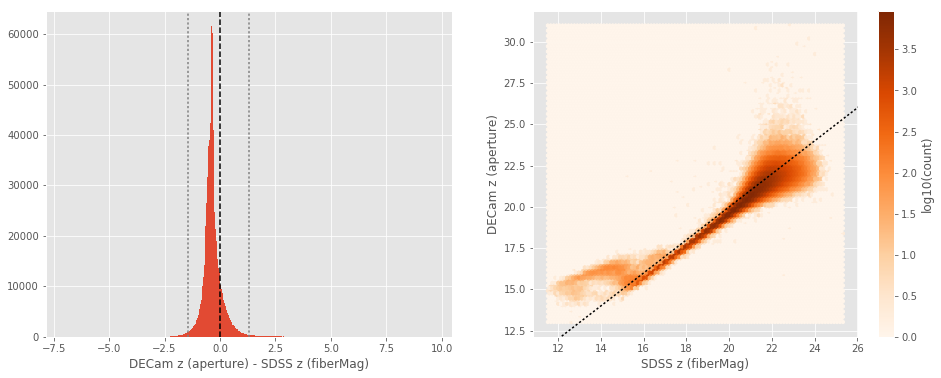

DECam z (total) - SDSS z (petroMag):
- Median: -0.05
- Median Absolute Deviation: 0.37
- 1% percentile: -4.001471099853516
- 99% percentile: 2.1159516525268556


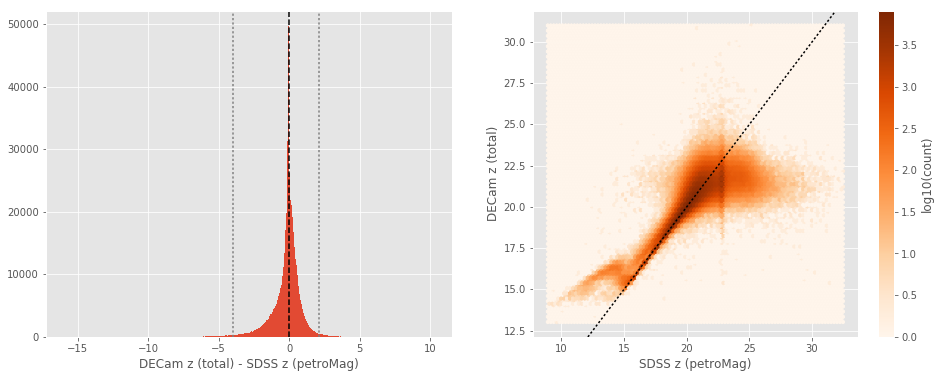

SUPRIME z (aperture) - SDSS z (fiberMag):
- Median: -0.21
- Median Absolute Deviation: 0.19
- 1% percentile: -1.2618062973022461
- 99% percentile: 0.9837664794921865


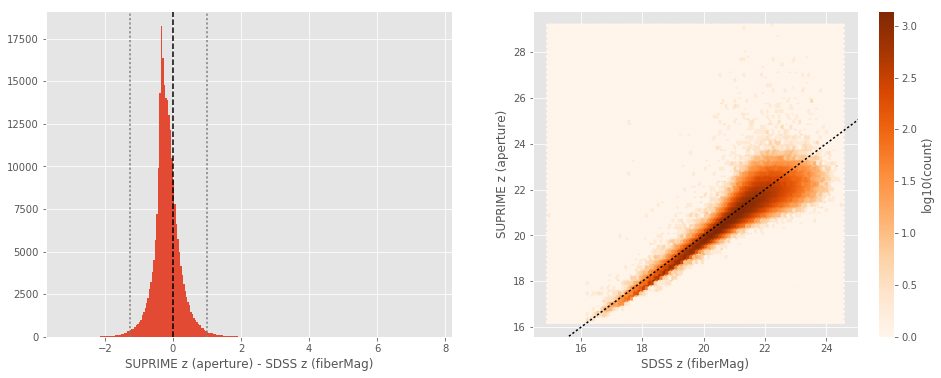

SUPRIME z (total) - SDSS z (petroMag):
- Median: 0.02
- Median Absolute Deviation: 0.46
- 1% percentile: -3.8373863220214846
- 99% percentile: 1.963347625732422


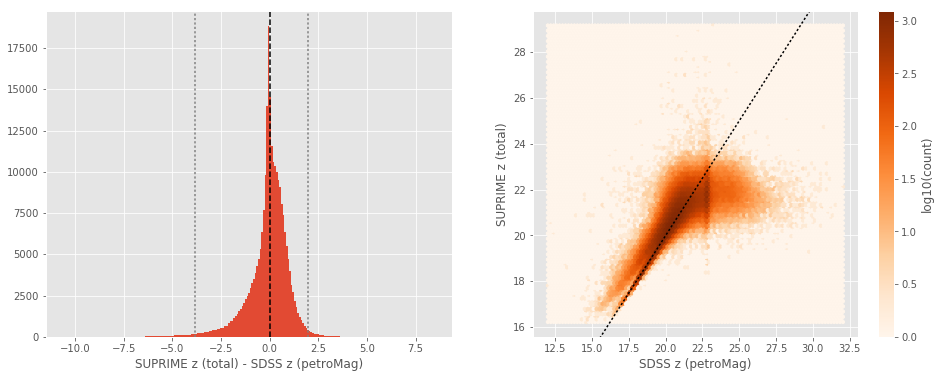

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.30
- Median Absolute Deviation: 0.18
- 1% percentile: -1.4636097908020018
- 99% percentile: 1.100358905792238


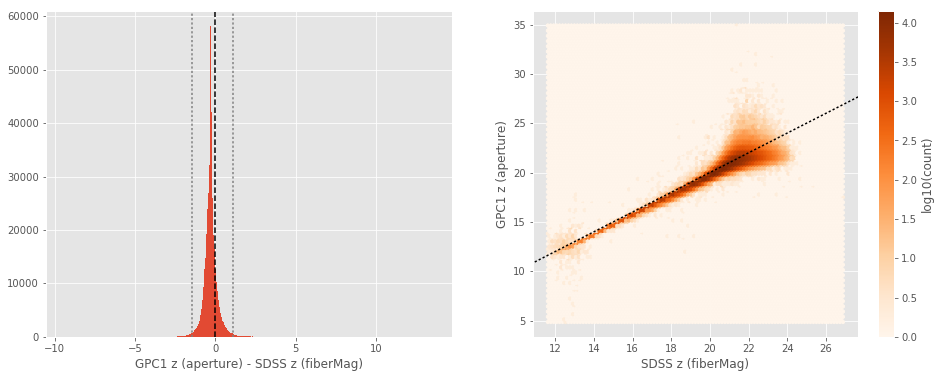

GPC1 z (total) - SDSS z (petroMag):
- Median: 0.02
- Median Absolute Deviation: 0.32
- 1% percentile: -3.900031566619873
- 99% percentile: 1.7810024833679203


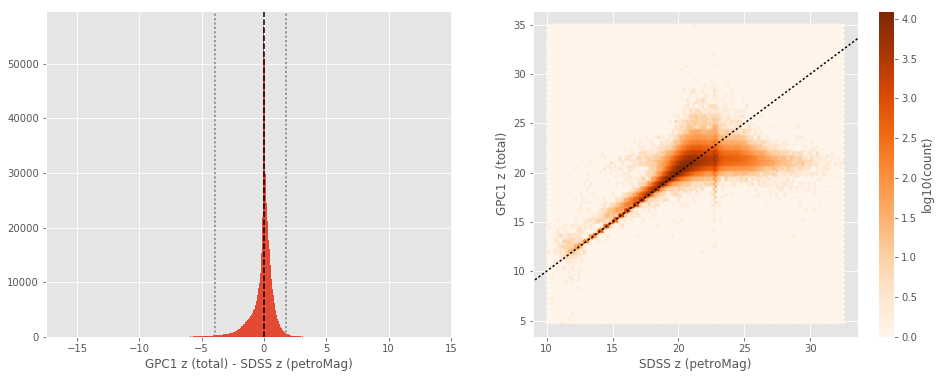

In [13]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap_colname = "fiberMag_{}".format(band[-1])
        sdss_mag_tot_colname = "petroMag_{}".format(band[-1])
        master_cat_mag_ap_colname = "m_ap_{}".format(band.replace(" ", "_").lower())
        master_cat_mag_tot_colname = "m_ap_{}".format(band.replace(" ", "_").lower())
        
        # Set SDSS magnitudes to NaN when the magnitude  is negative as SDSS uses large
        # negative numbers for missing magnitudes
        sdss[sdss_mag_ap_colname][sdss[sdss_mag_ap_colname] < 0.] = np.nan
        sdss[sdss_mag_tot_colname][sdss[sdss_mag_tot_colname] < 0.] = np.nan
        
        sdss_mag_ap = sdss[sdss_mag_ap_colname]
        master_cat_mag_ap = master_catalogue[master_cat_mag_ap_colname][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss[sdss_mag_tot_colname]
        master_cat_mag_tot = master_catalogue[master_cat_mag_tot_colname][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [14]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [15]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_GAMA-15.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J:
- Median: 0.06
- Median Absolute Deviation: 0.06
- 1% percentile: -0.7037645471097779
- 99% percentile: 0.6007539929292832


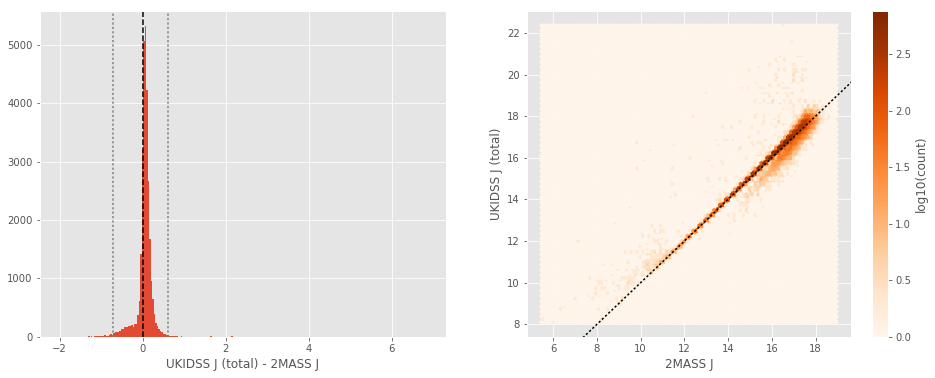

In [16]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_ukidss_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

UKIDSS Ks-like (total) - 2MASS Ks:
- Median: 0.13
- Median Absolute Deviation: 0.09
- 1% percentile: -0.8042154709490332
- 99% percentile: 1.106456388792177


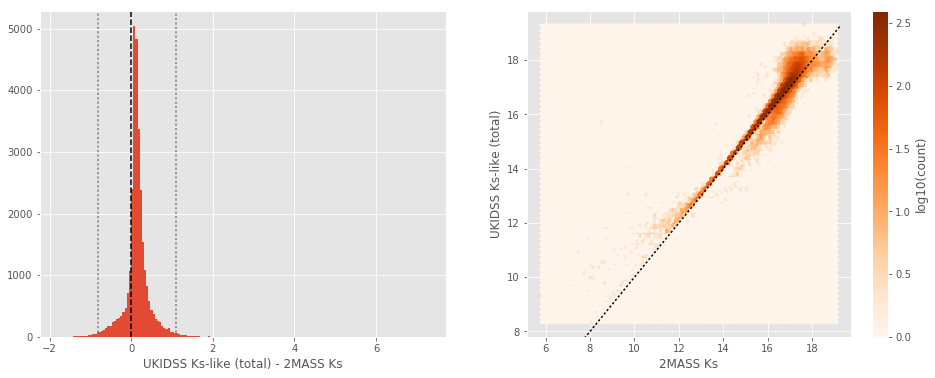

In [17]:
ukidss_ks_like = master_catalogue['m_ukidss_k'] + 0.003 + 0.004 * (
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'])
nb_compare_mags(twomass['kmag'] + k_2mass_to_ab, ukidss_ks_like[ml_twomass_idx],
                labels=("2MASS Ks", "UKIDSS Ks-like (total)"))

VISTA J (total) - 2MASS J:
- Median: 0.04
- Median Absolute Deviation: 0.07
- 1% percentile: -1.0072400489713493
- 99% percentile: 1.1234433082674224


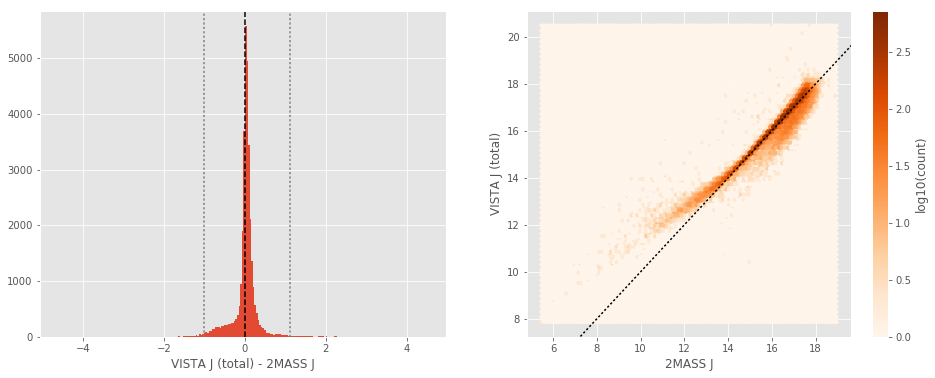

In [18]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_vista_j'][ml_twomass_idx],
                labels=("2MASS J", "VISTA J (total)"))

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 5937538 / 14232880 (41.72%)


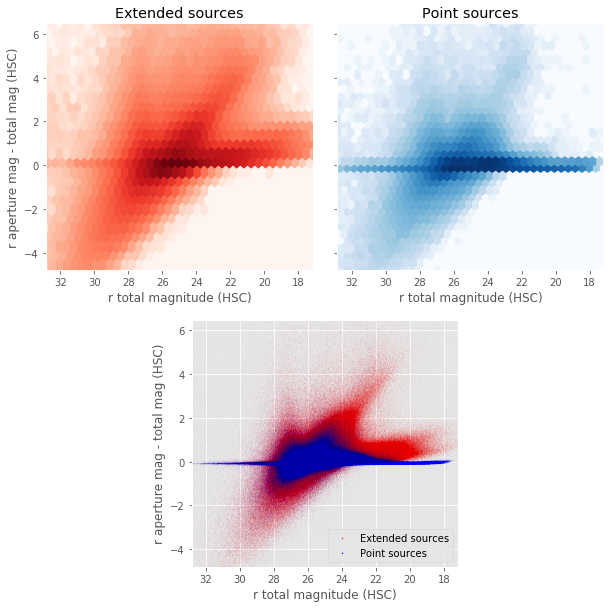

In [19]:
nb_ccplots(
    master_catalogue['m_suprime_r'],
    master_catalogue['m_ap_suprime_r'] - master_catalogue['m_suprime_r'],
    "r total magnitude (HSC)", "r aperture mag - total mag (HSC)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


Number of source used: 68178 / 14232880 (0.48%)


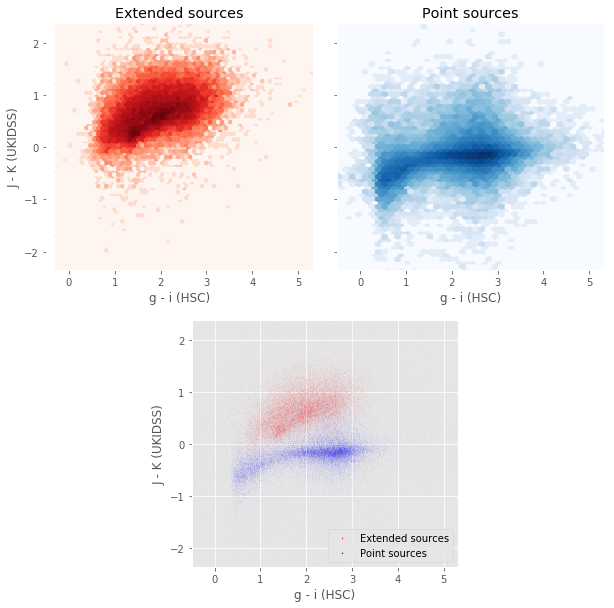

In [20]:
nb_ccplots(
    master_catalogue['m_suprime_g'] - master_catalogue['m_suprime_i'],
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    "g - i (HSC)", "J - K (UKIDSS)",
    master_catalogue["stellarity"]
)

Number of source used: 279701 / 14232880 (1.97%)


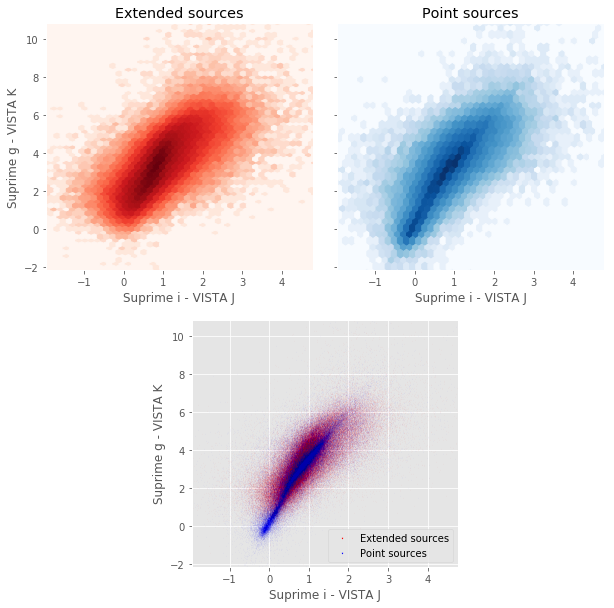

In [21]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_vista_j'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_vista_k'],
    "Suprime i - VISTA J", "Suprime g - VISTA K",
    master_catalogue["stellarity"]
)

Number of source used: 68180 / 14232880 (0.48%)


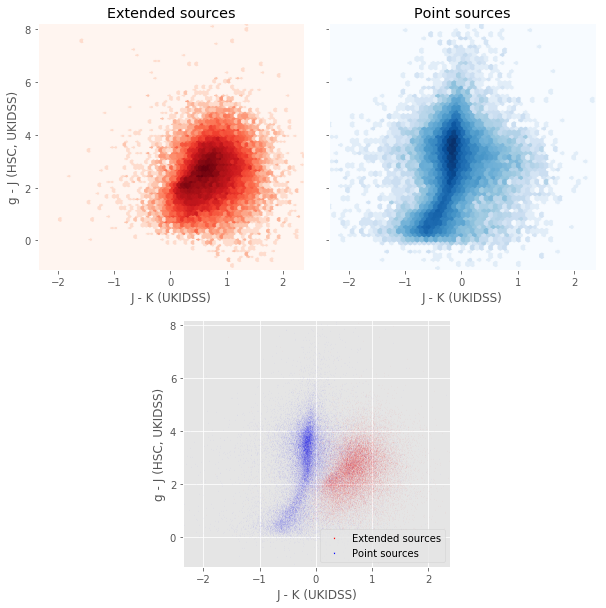

In [22]:
nb_ccplots(
    master_catalogue['m_ukidss_j'] - master_catalogue['m_ukidss_k'],
    master_catalogue['m_suprime_g'] - master_catalogue['m_ukidss_j'],
    "J - K (UKIDSS)", "g - J (HSC, UKIDSS)",
    master_catalogue["stellarity"]
)

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


Number of source used: 84746 / 14232880 (0.60%)


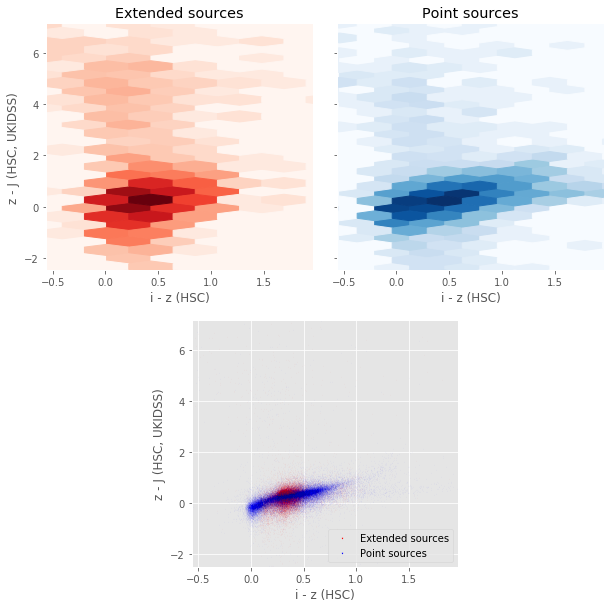

In [23]:
nb_ccplots(
    master_catalogue['m_suprime_i'] - master_catalogue['m_suprime_z'],
    master_catalogue['m_suprime_z'] - master_catalogue['m_ukidss_j'],
    "i - z (HSC)", "z - J (HSC, UKIDSS)",
    master_catalogue["stellarity"]
)